# Visualização de dados

Notebook com exemplos de código para visualização de dados com PySpark.

In [1]:
%pip install ipython-autotime
%pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=865242973f1acaed8a17a3650e54e643bdaab0b551c5b7a267b08966edd439eb
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
from google.colab          import drive, files
from pyspark.sql           import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types     import *

%load_ext autotime

time: 303 µs (started: 2023-09-30 14:05:01 +00:00)


# Início da sessão

In [3]:
drive.mount('/content/drive', force_remount=True)
spark = SparkSession.builder.master('local').appName('pyspark_app').getOrCreate()
spark

Mounted at /content/drive


time: 48.6 s (started: 2023-09-30 14:06:13 +00:00)


# Leitura de arquivos

In [7]:
houses = spark.read.csv("/content/drive/MyDrive/datasets/housing/housing.csv", header=True, inferSchema=True, encoding='utf-8')
print(f'shape={houses.count(), len(houses.columns)}')
houses.show(5)

shape=(20640, 10)
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37

# Visualização com Seaborn

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colors = sns.color_palette()
%matplotlib inline

time: 13.1 ms (started: 2023-09-30 14:32:49 +00:00)


O PySpark é recomendado quando temos que trabalhar com Big Data, ou seja, grande quantidade de dados que não cabem na memória principal de um computador pessoal. Para fazer uma vizualização de dados de forma eficiente, que não leve muito tempo na renderização dos gráficos é recomendável fazer amostragens dos dados. A desvantagem é que perdemos informação e os gráficos ficam menos precisos.

In [15]:
sample = houses.sample(fraction=0.1)

time: 18.2 ms (started: 2023-09-30 14:23:40 +00:00)


Após a amostragem, podemos utilizar a função select() juntamente com collect() que retornará uma lista de valores que pode ser atribuída a um dos eixos do gráfico.

In [31]:
result = sample.select('longitude').collect()
axis_x = [[row[0] for row in result]]
axis_x = np.array(axis_x).ravel()

result = sample.select('latitude').collect()
axis_y = [[row[0] for row in result]]
axis_y = np.array(axis_y).ravel()

time: 685 ms (started: 2023-09-30 14:35:31 +00:00)


## scatterplot()

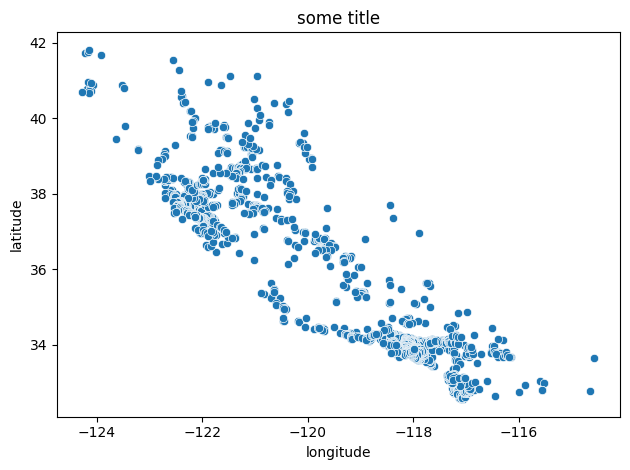

time: 300 ms (started: 2023-09-30 14:38:34 +00:00)


In [34]:
axis = sns.scatterplot(x=axis_x, y=axis_y)
axis.set(xlabel ="longitude", ylabel = "latitude", title ='some title')
plt.tight_layout()
plt.show()